<a href="https://colab.research.google.com/github/OlhaDot/NewProjectStadyAcademy/blob/master/ts_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from datetime import datetime

In [252]:
url = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_history_startY_maxDR.csv'
data = pd.read_csv(url, sep=';')
print(data.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20121231  0.2           7.5      0.6         10.3          8.0   
1  20131231  0.0           7.2     -0.3         10.6          8.0   
2  20141231 -6.6           9.3     12.1         15.7         11.9   
3  20151231 -9.8           9.1     48.5         24.2         21.8   
4  20161231  2.4           9.3     14.9         28.3         25.5   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop        DR  
0           7.5         10.5          8.0  0.062021  
1           6.5         11.0          8.0  0.077217  
2          14.0         19.2         15.8  0.150833  
3          22.0         26.2         24.0  0.285379  
4          14.0         28.4         27.2  0.063257  


In [253]:
data2 = data.copy()


In [254]:
data2.describe()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
count,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,2.017623e+07,-2.375000,10.108333,12.891667,26.400000,23.175000,13.750000,27.808333,24.391667,0.099619
std,3.605551e+04,9.588167,3.161259,12.784185,9.388872,9.178941,5.948644,9.991311,9.545914,0.071323
min,2.012123e+07,-29.100000,7.200000,-0.300000,10.300000,8.000000,6.000000,10.500000,8.000000,0.040805
25%,2.014873e+07,-4.500000,8.650000,6.600000,22.075000,19.325000,8.625000,24.450000,21.725000,0.057360
50%,2.017623e+07,1.300000,9.300000,11.550000,29.450000,26.200000,14.000000,29.650000,27.250000,0.074863
75%,2.020373e+07,3.250000,9.600000,14.600000,32.150000,27.225000,15.750000,33.800000,28.150000,0.123938
max,2.023123e+07,5.700000,18.000000,48.500000,39.600000,36.600000,25.000000,42.200000,38.000000,0.285379


In [255]:
data2.corr()

,Date,GDP,Unemployment,CPI_avg,EUR_UAH_avg,USD_UAH_avg,Key_rate_eop,EUR_UAH_eop,USD_UAH_eop,DR
Date,1.000000,-0.128722,0.725401,0.050588,0.921120,0.919525,0.288222,0.905074,0.896062,-0.031595
GDP,-0.128722,1.000000,-0.598506,-0.400830,-0.012593,-0.073642,-0.596467,-0.157540,-0.199033,-0.381463
Unemployment,0.725401,-0.598506,1.000000,0.249420,0.623302,0.674408,0.598118,0.719986,0.753614,0.258591
CPI_avg,0.050588,-0.400830,0.249420,1.000000,0.241048,0.275533,0.763537,0.285174,0.345655,0.799107
EUR_UAH_avg,0.921120,-0.012593,0.623302,0.241048,1.000000,0.994210,0.424831,0.972741,0.971996,-0.002890
USD_UAH_avg,0.919525,-0.073642,0.674408,0.275533,0.994210,1.000000,0.468887,0.976791,0.983454,0.032596
Key_rate_eop,0.288222,-0.596467,0.598118,0.763537,0.424831,0.468887,1.000000,0.476802,0.550519,0.472887
EUR_UAH_eop,0.905074,-0.157540,0.719986,0.285174,0.972741,0.976791,0.476802,1.000000,0.990185,0.086598
USD_UAH_eop,0.896062,-0.199033,0.753614,0.345655,0.971996,0.983454,0.550519,0.990185,1.000000,0.122591
DR,-0.031595,-0.381463,0.258591,0.799107,-0.002890,0.032596,0.472887,0.086598,0.122591,1.000000


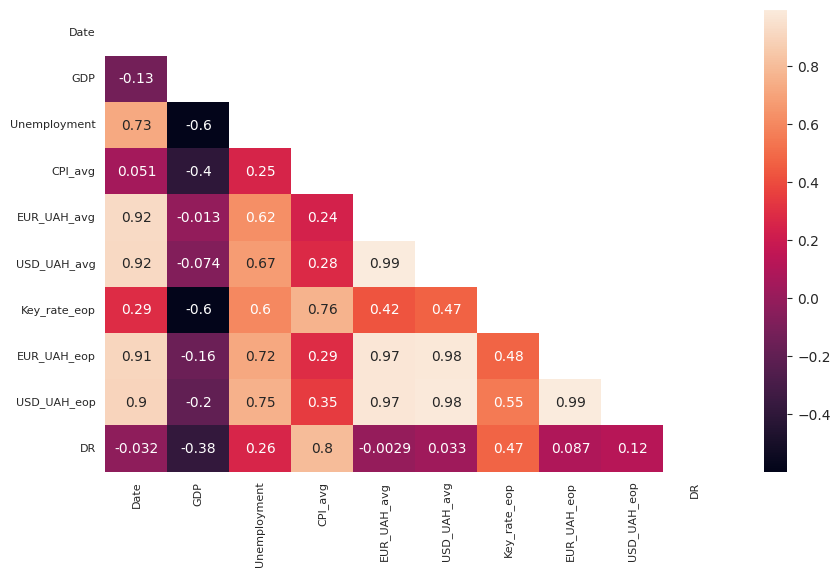

In [256]:
plt.figure(figsize=(10, 6))
mask = np.triu(np.ones_like(data2.corr(), dtype=bool))
sns.heatmap(data2.corr(), mask=mask, annot=True, annot_kws={"size": 10})
sns.set_style('white')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In [257]:
# model determination
DR = data2["DR"]
X = data2.drop(['DR'], axis = 1)

macro = sm.add_constant(X)
regression = sm.OLS(DR, macro)
result = regression.fit()

In [258]:
# model result
pd.DataFrame({'coef': result.params, 'P_value': round(result.pvalues,3)})
# P-value should be < 0.05 - then ok, other parameters must be excluded

,coef,P_value
const,-83.153629,0.325
Date,0.000004,0.325
GDP,0.005794,0.282
Unemployment,-0.006897,0.816
CPI_avg,0.006653,0.087
EUR_UAH_avg,-0.035380,0.455
USD_UAH_avg,-0.005518,0.805
Key_rate_eop,0.001230,0.888
EUR_UAH_eop,0.005178,0.718
USD_UAH_eop,0.019935,0.598


In [259]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     3.432
Date:                Fri, 16 Feb 2024   Prob (F-statistic):              0.246
Time:                        15:05:42   Log-Likelihood:                 31.981
No. Observations:                  12   AIC:                            -43.96
Df Residuals:                       2   BIC:                            -39.11
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -83.1536     64.313     -1.293   

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [260]:
# error - stand dev error
result.bse

const           64.312942
Date             0.000003
GDP              0.003968
Unemployment     0.026082
CPI_avg          0.002098
EUR_UAH_avg      0.038489
USD_UAH_avg      0.019653
Key_rate_eop     0.007713
EUR_UAH_eop      0.012474
USD_UAH_eop      0.032074
dtype: float64

In [261]:
# test linear model - basic (all variables)
LinReg = LinearRegression()
LinReg.fit( macro, DR)

r_sq = LinReg.score( macro, DR)
print("coef of determination - v1:", r_sq )


coef of determination - v1: 0.9391890313341353


In [262]:
# test linear model 2 wo some macro
macro = data2.copy()
# now we can drop variables with p_value > 0.05
macro2 = macro.drop(['Date', 'GDP', 'Unemployment', 'USD_UAH_avg', 'Key_rate_eop' , 'EUR_UAH_eop', 'USD_UAH_eop', 'DR'], axis = 1)
# Date	GDP	Unemployment	CPI_avg	EUR_UAH_avg	USD_UAH_avg	Key_rate_eop	EUR_UAH_eop	USD_UAH_eop
# GDP	Unemployment	CPI_avg	EUR_UAH_avg	USD_UAH_avg	Key_rate_eop	EUR_UAH_eop	USD_UAH_eop 'hist_dat',

LinReg = LinearRegression()
LinReg.fit( macro2, DR)

r_sq = LinReg.score( macro2, DR)
print("coef of determination - v2:", r_sq )

regression = sm.OLS(DR, macro2)
result = regression.fit()


coef of determination - v2: 0.679155636199693


# **RESIDUALS = DIFF BETWEEN INPUT DATA AND MODELLING DATA **

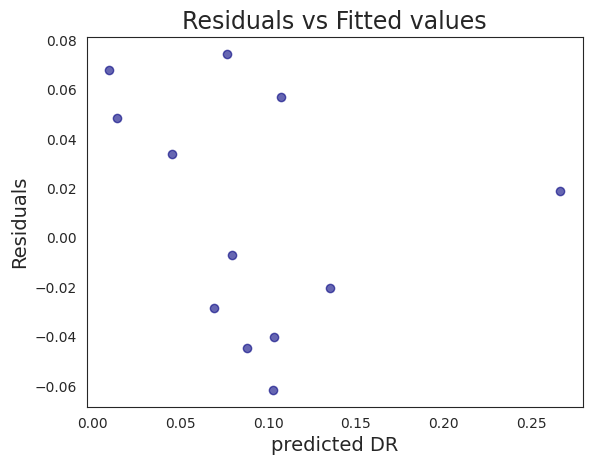

In [263]:
# Residuals vs Predicted level
plt.scatter(x=result.fittedvalues, y =result.resid, c='navy', alpha= 0.6)

plt.xlabel("predicted DR" , fontsize = 14)
plt.ylabel("Residuals" , fontsize = 14)
plt.title("Residuals vs Fitted values" , fontsize = 17)
plt.show()

<ipython-input-264-2a7be3e43912>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, color = 'navy')


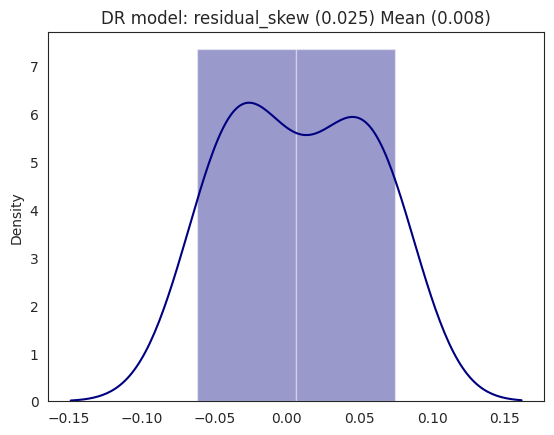

In [264]:
# distribution of residuals
residual_mean = round(result.resid.mean(),3)
residual_skew = round(result.resid.skew(),3)

sns.distplot(result.resid, color = 'navy')
plt.title(f"DR model: residual_skew ({residual_skew}) Mean ({residual_mean})")
plt.show()

# **forecast**

In [265]:
# macro_predicred
# simple LinRegretion
Y_PRED = LinReg.predict(macro2)
print("predicted values according to model:",  Y_PRED)

predicted values according to model: [0.06677625 0.06203957 0.11274106 0.27177816 0.10613747 0.10156189
 0.08166972 0.07202978 0.04439945 0.07330083 0.12178379 0.08121309]


In [266]:
print('Coefficient of determination/ Level of confidance:', round(LinReg.score(macro2, DR),2))
print('Mean Absolute Error:', metrics.mean_absolute_error(DR, Y_PRED))
print('Mean Squared Error:', metrics.mean_squared_error(DR, Y_PRED))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(DR, Y_PRED)))

Coefficient of determination/ Level of confidance: 0.68
Mean Absolute Error: 0.03080252458220639
Mean Squared Error: 0.001496116905780153
Root Mean Squared Error: 0.038679670445599106


In [267]:
def int_to_date(data):
  date_str = str(data)
  date = datetime.strptime(date_str, '%Y%m%d')
  return date.strftime('%d-%m-%Y')

data2["hist_dat"] = data2['Date'].apply(lambda x: int_to_date(x))

formatted_column = data2.pop('hist_dat')
data2.insert(0, 'hist_dat', formatted_column)


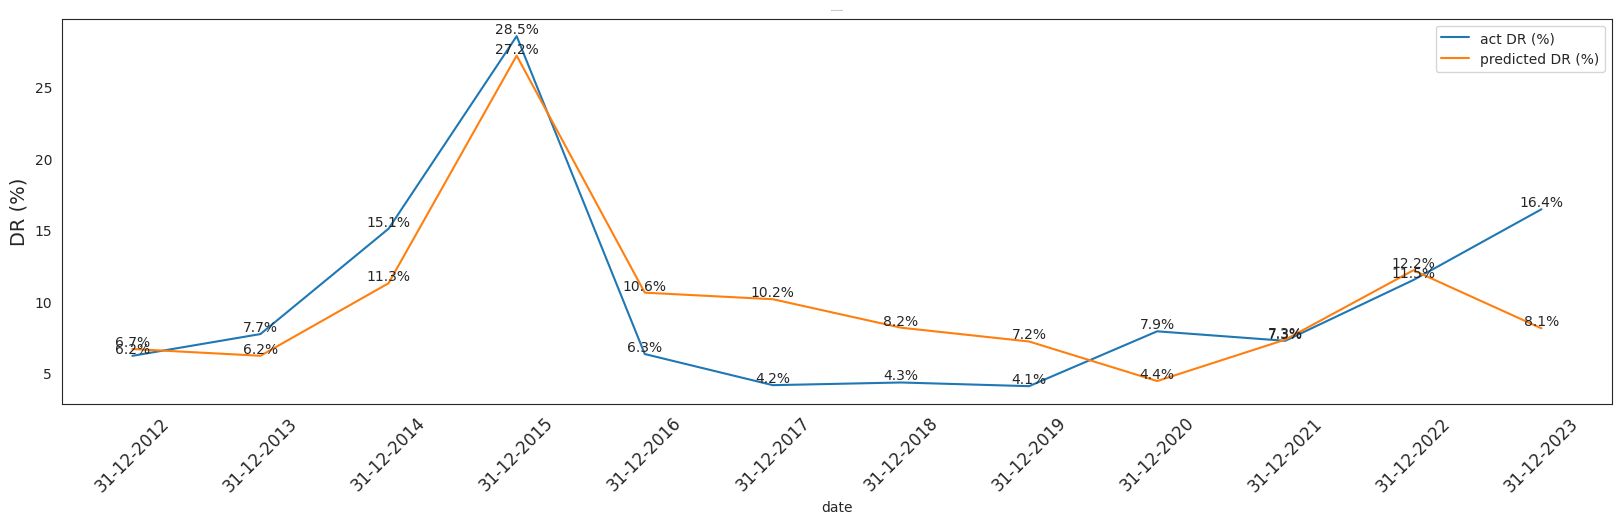

In [268]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(data2['hist_dat'], DR * 100, label="act DR (%)")
plt.plot(data2['hist_dat'], Y_PRED * 100, label="predicted DR (%)")

for i in range(len(data2['hist_dat'])):
    plt.text(data2['hist_dat'][i], DR[i] * 100, '{:.1f}%'.format(DR[i] * 100), ha='center', va='bottom')

for i in range(len(data2['hist_dat'])):
    plt.text(data2['hist_dat'][i], Y_PRED[i] * 100, '{:.1f}%'.format(Y_PRED[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR (%)', fontsize=14)
plt.title('Fact vs Forecast', fontsize=1)
plt.legend()

plt.show()

In [269]:
url_f = 'https://raw.githubusercontent.com/OlhaDot/NewProjectStadyAcademy/master/StressTestAval/makro_FCST_Y.csv'
date_forecast = pd.read_csv(url_f, sep=';')
print(date_forecast.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
0  20241231    5            12        7           43           39   
1  20251231    7             9        9           48           42   
2  20261231    6             8        7           51           43   
3  20241231   -8            20       20           46           41   
4  20251231   -5            18       17           59           52   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
0            13           47           41  base   
1            10           49           43  base   
2             8           51           44  base   
3            25           55           48  worst  
4            25           64           55  worst  


In [270]:
print(macro2)

    CPI_avg  EUR_UAH_avg
0       0.6         10.3
1      -0.3         10.6
2      12.1         15.7
3      48.5         24.2
4      14.9         28.3
5      14.5         30.0
6      11.0         32.1
7       7.9         28.9
8       2.7         30.8
9       9.3         32.3
10     20.1         34.0
11     13.4         39.6


In [275]:
macro_new = date_forecast.copy()
# base scenario
macro_base_forecast = macro_new[macro_new['FCST'] != 'worst']
macro_base_forecast = macro_base_forecast.drop([ 'Date', 'GDP', 'Unemployment', 'USD_UAH_avg', 'Key_rate_eop' , 'EUR_UAH_eop', 'USD_UAH_eop',  'FCST'], axis = 1)
print(macro_base_forecast.head())


# macro = sm.add_constant(X)
# regression = sm.OLS(DR, macro)
# result = regression.fit()

   CPI_avg  EUR_UAH_avg
0        7           43
1        9           48
2        7           51


In [88]:
# worse scenario
# macro_worse_forecast = macro_new[macro_new['FCST'] == 'worst']
# print(macro_worse_forecast.head())


       Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  USD_UAH_avg  \
3  20241231   -8            20       20           46           41   
4  20251231   -5            18       17           59           52   
5  20261231   -5            17       14           67           58   

   Key_rate_eop  EUR_UAH_eop  USD_UAH_eop   FCST  
3            25           55           48  worst  
4            25           64           55  worst  
5            20           70           60  worst  


In [276]:
macro_base_forecast_2 =  sm.add_constant(macro_base_forecast)
print(macro_base_forecast_2)

   const  CPI_avg  EUR_UAH_avg
0    1.0        7           43
1    1.0        9           48
2    1.0        7           51


In [277]:
# test linear model - basic (all variables)

y_forecast_base= result.predict(macro_base_forecast)

In [247]:
print(macro_base_forecast)

   GDP  Unemployment  CPI_avg  EUR_UAH_avg
0    5            12        7           43
1    7             9        9           48
2    6             8        7           51


In [278]:
print(y_forecast_base)

0    0.079108
1    0.094217
2    0.087335
dtype: float64


In [244]:
# def int_to_date(data):
#   date_str = str(data)
#   date = datetime.strptime(date_str, '%Y%m%d')
#   return date.strftime('%d-%m-%Y')

macro_base_forecast["hist_dat"] = macro_base_forecast['Date'].apply(lambda x: int_to_date(x))

formatted_column = macro_base_forecast.pop('hist_dat')
macro_base_forecast.insert(0, 'hist_dat', formatted_column)

KeyError: 'Date'

In [32]:
print(macro_base_forecast)

     hist_dat  const      Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  \
0  31-12-2024    1.0  20241231    5            12        7           43   
1  31-12-2025    1.0  20251231    7             9        9           48   
2  31-12-2026    1.0  20261231    6             8        7           51   

   USD_UAH_avg  Key_rate_eop  EUR_UAH_eop  USD_UAH_eop  
0           39            13           47           41  
1           42            10           49           43  
2           43             8           51           44  


In [245]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(macro_base_forecast['hist_dat'], y_forecast_base * 100, label="forecasted DR (%)")


for i in range(len(macro_base_forecast['hist_dat'])):
    plt.text(macro_base_forecast['hist_dat'][i], y_forecast_base[i] * 100, '{:.1f}%'.format(y_forecast_base[i] * 100), ha='center', va='bottom')


plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR forecasted(%)', fontsize=14)


plt.show()

KeyError: 'hist_dat'

<Figure size 2000x500 with 0 Axes>

In [ ]:
macro_worse_forecast =  sm.add_constant(macro_worse_forecast)
y_forecast_worse= LinReg.predict(macro_worse_forecast)

In [ ]:
print(y_forecast_worse)

[0.24219747 0.19997574 0.21417686]


In [ ]:
macro_worse_forecast["hist_dat"] = macro_worse_forecast['Date'].apply(lambda x: int_to_date(x))

formatted_column = macro_worse_forecast.pop('hist_dat')
macro_worse_forecast.insert(0, 'hist_dat', formatted_column)

In [ ]:
print(macro_worse_forecast)

     hist_dat  const      Date  GDP  Unemployment  CPI_avg  EUR_UAH_avg  \
3  31-12-2024    1.0  20241231   -8            20       20           46   
4  31-12-2025    1.0  20251231   -5            18       17           59   
5  31-12-2026    1.0  20261231   -5            17       14           67   

   USD_UAH_avg  Key_rate_eop  EUR_UAH_eop  USD_UAH_eop  
3           41            25           55           48  
4           52            25           64           55  
5           58            20           70           60  


KeyError: 0

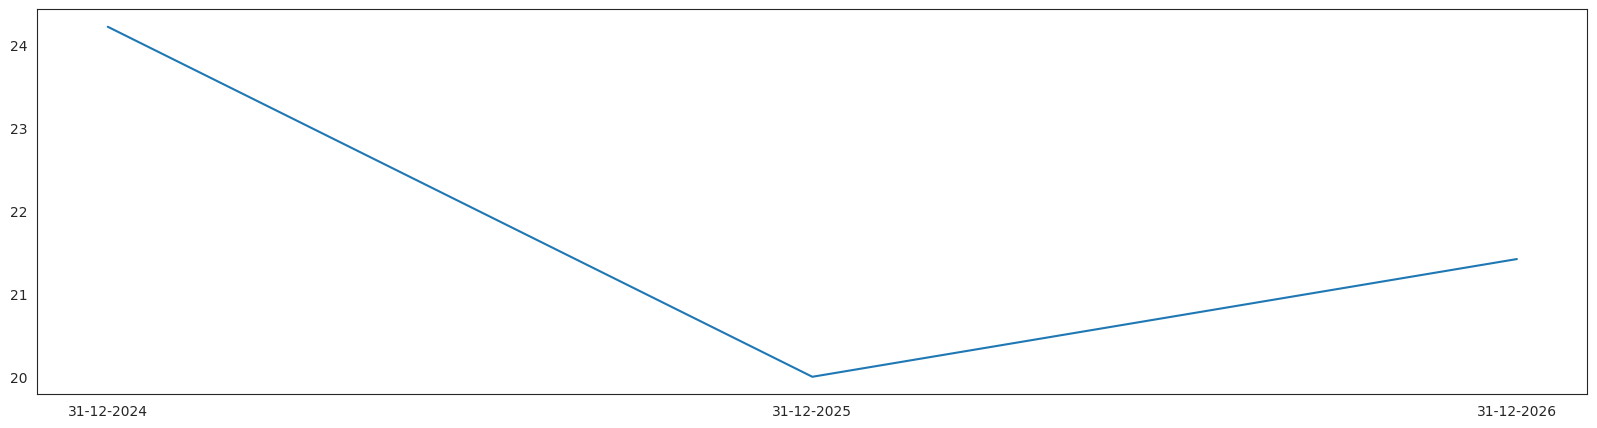

In [ ]:
plt.figure(figsize=(20, 5))  # Adjusted figure size
plt.plot(macro_worse_forecast['hist_dat'], y_forecast_worse * 100, label="forecasted worse DR (%)")

for i in range(len(macro_worse_forecast['hist_dat'])):
    plt.text(macro_worse_forecast['hist_dat'][i], y_forecast_worse[i] * 100, '{:.1f}%'.format(y_forecast_worse[i] * 100), ha='center', va='bottom')

plt.xlabel('date')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('DR forecasted worse(%)', fontsize=14)

plt.show()